In [101]:
#Librerias

import sympy as sp
import numpy as np
import numpy.linalg as la
from scipy.linalg import eig, eigh
import matplotlib.pyplot as plt

# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Orly de Jesus Rivera Cruz
*Métodos computacionales 2025-I*

---

# 1.

<center>

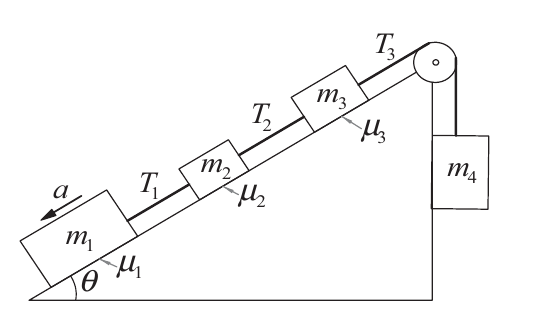

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta) 
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta) 
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta) 
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [ ]:
#Problema 1

m = np.array([10   ,4    ,5    ,6 ])                #Se guardan los datos necesarios
u = np.array([0.25 , 0.3 , 0.2 , 0])

θ = np.pi/4
g = 9.81

"""

Si tomamos como incognitas (T1 , T2, T3 , a) entonces obtenemos la siguiente matriz aumentada

(1 , 0 , 0 , m1)  (T1) = m1g(sinθ -u1cosθ)
(-1 , 1 , 0 , m2) (T2) = m2g(sinθ -u2cosθ)
(0 , -1 , 1 , m3) (T3) = m3g(sinθ -u3cosθ)
(0 , 0 , -1 , m4) (a)  = -m4g

Por lo que escribimos las matrices

"""

A = np.array([                  #Se crea la matriz de las tensiones con la acceleracion
    [1,0,0,m[0]],
    [-1,1,0,m[1]],
    [0,-1,1,m[2]],
    [0,0,-1,m[3]]
    ],dtype=float)

b = np.array([ m[0]*g*(np.sin(θ) - u[0]*np.cos(θ)) , m[1]*g*(np.sin(θ) - u[1]*np.cos(θ)) , m[2]*g*(np.sin(θ) - u[2]*np.cos(θ)) , -m[3]*g],dtype=float) #El vector resultante

T1 , T2 , T3 , a = la.solve(A,b)            #Se resuelve con numpy

print("La tension de las cuerdas T1,T2,T3 respectivamente son:\nT1 = ",T1,"\nT2 = ",T2,"\nT3 = ",T3,"\n\nAdemas la aceleracion del sistema es de:\na = ",a)


La tension de las cuerdas T1,T2,T3 respectivamente son:
T1 =  35.89135719172326 
T2 =  48.86055656372456 
T3 =  68.54041454044619 

Ademas la aceleracion del sistema es de:
a =  1.6134024234076987


# 2. 
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

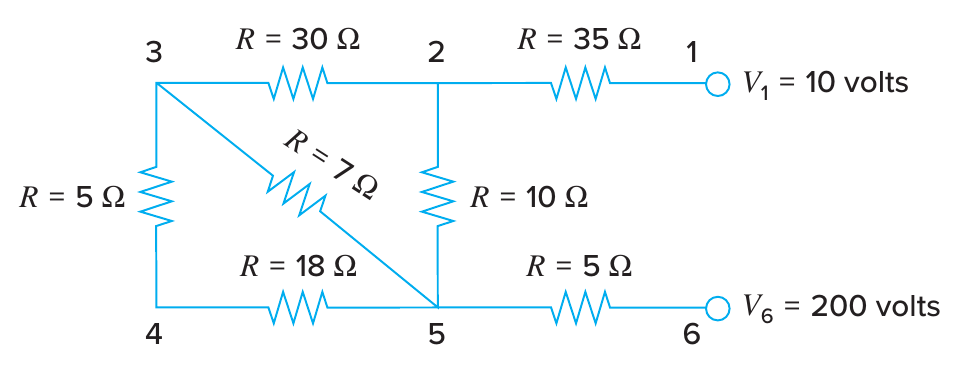


In [ ]:
#Problema 2

R12 = 35            #Se escriben las resistencias vistas
R23 = 30
R34 = 5
R45 = 18
R35 = 7
R25 = 10
R56 = 5

"""
En este caso encontraremos las ecuaciones de Kirchoff a mano

Por el lado de la ley de nodos obtenemos que:

i1 - i2 - i3 = 0
i2 - i4 - i5 = 0
i6 - i2 - i3 = 0

Por el lado de la ley de mallas obtenemos que:

i2*R23 + i4(R34 + R45) - i3*R25 = 0
i4(R34 + R45) - i5*R35 = 0
i1*R12 + i3*R25 + i6*R56 = 190

Por lo que obtenemos la relacion matricial de:

( 1   , -1  , -1   , 0          , 0    , 0   ) (i1) = 0
( 0   , 1   , 0    , -1         , -1   , 0   ) (i2) = 0
( 0   , -1  , -1   , 0          , 0    , 1   ) (i3) = 0
( 0   , R23 , -R25 , R34 + R45  , 0    , 0   ) (i4) = 0
( 0   , 0   , 0    , R34 + R45  , -R35 , 0   ) (i5) = 0
( R12 , 0   , R25  , 0          , 0    , R56 ) (i6) = 190


"""

A = np.array([
    [1   , -1  , -1   , 0          , 0    , 0  ],               #Se escribe la matriz de las corrientes 
    [0   , 1   , 0    , -1         , -1   , 0  ],
    [0   , -1  , -1   , 0          , 0    , 1  ],
    [0   , R23 , -R25 , R34 + R45  , 0    , 0  ],
    [0   , 0   , 0    , R34 + R45  , -R35 , 0  ],
    [R12 , 0   , R25  , 0          , 0    , R56]], dtype = float)

b = np.array([0,0,0,0,0,190])               #El vector resultante

i1,i2,i3,i4,i5,i6 = la.solve(A,b)               #Se resuelve con numpy

print("Las corrientes respectivamente son:")
print("La corriente 12 es:" ,i1,"A")
print("La corriente 23 es:" ,i2,"A")
print("La corriente 25 es:" ,i3,"A")
print("La corriente 345 es:",i4,"A")
print("La corriente 35 es:" ,i5,"A")
print("La corriente 56 es:" ,i6,"A")

Las corrientes respectivamente son:
La corriente 12 es: 3.975249807840123 A
La corriente 23 es: 0.876249039200615 A
La corriente 25 es: 3.0990007686395082 A
La corriente 345 es: 0.20445810914681015 A
La corriente 35 es: 0.6717909300538047 A
La corriente 56 es: 3.975249807840123 A


# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), 
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

La matriz diagonal queda asi:
 [[4.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 2.+1.68652966e-08j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 2.-1.68652966e-08j]]


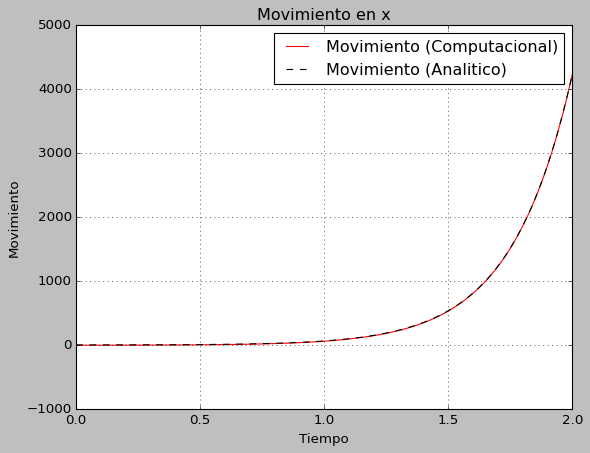

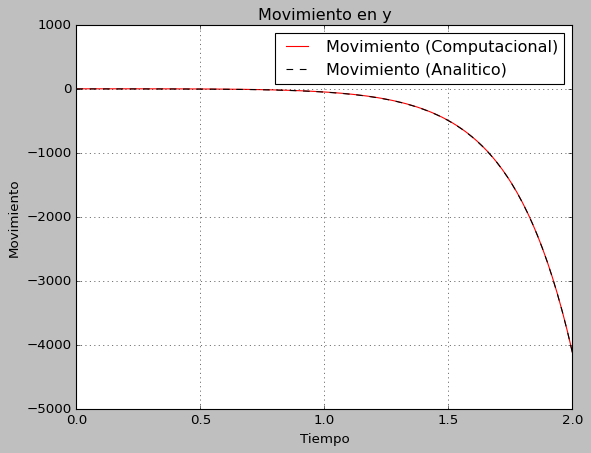

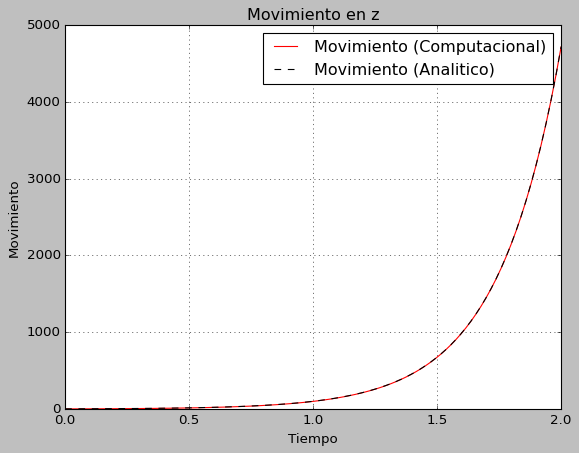

In [ ]:
#Problema 3

A = np.array([
    [2 , -1 , 1 ],                      #Se crea la matriz de las componentes
    [0 , 3  , -1],
    [2 , 1  , 3 ]],
    dtype=float)

Valores , Vectores = la.eig(A)          #Obtenemos los autovalores y autovectores para diagonalizar la matriz

U = Vectores                            #Matriz de los vectores
U_ = la.inv(Vectores)                   #Matriz inversa del os vectores
Diagonal = np.diag(Valores)             #Se diagonaliza
print("La matriz diagonal queda asi:\n",Diagonal)

Tiempo = np.linspace(0,2,100)

x = np.zeros(100)
y = np.zeros(100)
z = np.zeros(100)

for i,t in enumerate(Tiempo):               #Se obtiene la posicion por medio de la solucion dada y el punto inicial 
    Posicion = (U@(np.exp(Diagonal*t))@U_)@np.array([1,1,2])        
    x[i] , y[i] , z[i] = Posicion.real


xa = np.zeros(100)
ya = np.zeros(100)
za = np.zeros(100)

for i,t in enumerate(Tiempo):               #Se obtiene la posicion por medio de la solucion analitica dada
    xa[i] = ((np.exp(2*t)*(1 + np.exp(2*t) - 2*t)) + (-2*t*np.exp(2*t)) + 2*(np.exp(2*t) * ( -1 + np.exp(2*t))))*(1/2)  
    ya[i] = ((-np.exp(2*t)*(-1 + np.exp(2*t) - 2*t)) + (2*(t+1)*np.exp(2*t)) + 2*(-np.exp(2*t) * ( -1 + np.exp(2*t))))*(1/2) 
    za[i] = ((np.exp(2*t)*(-1 + np.exp(2*t) + 2*t)) + (2*t*np.exp(2*t)) + 2*(np.exp(2*t) * ( 1 + np.exp(2*t))))*(1/2) 

#---------------------                                          #Se comparan los movimientos en las 3 direcciones 

plt.title("Movimiento en x")

plt.xlabel("Tiempo")
plt.ylabel("Movimiento")

plt.plot(Tiempo , x , label="Movimiento (Computacional)" , c = "red")
plt.plot(Tiempo , xa , label="Movimiento (Analitico)" , c = "black" , ls="--")

plt.legend()
plt.grid()
plt.show()

#---------------------

plt.title("Movimiento en y")

plt.xlabel("Tiempo")
plt.ylabel("Movimiento")

plt.plot(Tiempo , y , label="Movimiento (Computacional)" , c = "red")
plt.plot(Tiempo , ya , label="Movimiento (Analitico)" , c = "black" , ls="--")

plt.legend()
plt.grid()
plt.show()

#---------------------

plt.title("Movimiento en z")

plt.xlabel("Tiempo")
plt.ylabel("Movimiento")

plt.plot(Tiempo , z , label="Movimiento (Computacional)" , c = "red")
plt.plot(Tiempo , za , label="Movimiento (Analitico)" , c = "black" , ls="--")

plt.legend()
plt.grid()
plt.show()

print("Como podemos observar la diferencia es muy pequeña, imperceptible por lo que podemos ver, por lo que podemos confirmar que las respuestas son iguales")

# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -\bm{\mu} \cdot \bm{B} = -\gamma \bm{B} \cdot \bm{S}$, siendo $\gamma$ la razón giromagnética, $\bm{B}$ el campo magnético y $\bm{S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix} 
B_z & B_x - iB_y \\ 
B_x + iB_y & -B_z 
\end{pmatrix} 
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



In [ ]:
#Problema 4

γ = 2                                           #Copiamos los datos importantes
Bz = 1e-4
h_ = 1.054571817e-34

B = (0,0,Bz) #La componente x,y,z de el campo magnetico

Matriz_H = np.array([                           #Ponemos la matriz relacioanda con el campo magnetico
    [ Bz , 0],
    [0 , -Bz]], dtype=complex)

H = (γ*h_/2)*Matriz_H                           #Obtenemos el hamiltoniano

H_CT = np.conjugate(H.T)                        #Obtenemos la conjugada

print("Como nos damos cuenta nuestra matriz es hermitica por medio de el resultado dado osea:",np.isclose(H,H_CT).all())

Valores , Vectores = la.eig(H)                  #Obtenemos los autovalores y autovectores para los niveles de energia

print("\nPor la ecuacion 1 nos damos cuenta que los niveles de energia son los autovalores de esa matriz por lo que serian:")
print(Valores[0].real , "y" , Valores[1].real)

print("\nSus autovectores asociados son:")
print(Vectores[0].real , "y" , Vectores[1].real)

print("\nComo nos damos cuenta es la base en R2 'i' y 'j' que estan normalizadas")

Como nos damos cuenta nuestra matriz es hermitica por medio de el resultado dado osea: True

Por la ecuacion 1 nos damos cuenta que los niveles de energia son los autovalores de esa matriz por lo que serian:
1.054571817e-38 y -1.054571817e-38

Sus autovectores asociados son:
[1. 0.] y [0. 1.]

Como nos damos cuenta es la base en R2 'i' y 'j' que estan normalizadas


# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura. 

<center>

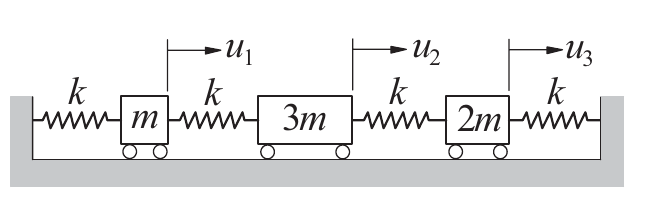
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1 
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2 
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

In [ ]:
#Problema 5

"""
Obtenemos la matriz K por un factor k (Cte elastica):

    (-2 , k  , 0)
k * ( 1 , -2 , 1)
    ( 0 , 1  , -2)

Y la matriz diagonal de masas M por un factor m (Masas):

    (1 , 0 , 0)
m * (0 , 3 , 0)
    (0 , 0 , 2)

Por lo que obtenemos el sistema

k*Ku = m*Mü

Pero si suponemos una solucion armonica obtenemos que

(k/m)*Ku = Mw²u
"""

k = 1                           #Estos valores pueden ser modificados, estan de esta manera de prueba
m = 1

K = np.array([                  #Obtenemos la matriz de el movimiento con la constante
    [-2 , 1  , 0 ],
    [ 1 , -2 , 1 ],
    [ 0 , 1  , -2]], dtype = float)

M = np.array([                  #Obtenemos la matriz de la aceleracion con la masa
    [1 , 0 , 0  ],
    [0 , 3 , 0  ],
    [0 , 0 , 2  ]], dtype = float)

Autovalores , Modos = eigh(K , M)       #Resolvemos con los autovalores y autovectores

Frecuencias = np.sqrt(abs(Autovalores)) * np.sqrt(k/m)      #Como resolvimos sin la cte k ni la cte m entocnes quedan como factor a la raiz cuando se despeja la frecuencia
#El valor absoluto esta dado por el problema fisico
print("Las frecuencias de vibracion con un factor de raiz(k/m) son de:")
print(Frecuencias)

print("\nSus modos asociados son:")
print(Modos)

Las frecuencias de vibracion con un factor de raiz(k/m) son de:
[1.49429737 1.08670167 0.50281358]

Sus modos asociados son:
[[-0.92033789 -0.27460877 -0.27851068]
 [ 0.21436937 -0.2249264  -0.48660787]
 [-0.08693531  0.62161659 -0.32563027]]
